<a href="https://colab.research.google.com/github/john80rph/test-page/blob/main/ddd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


2237



Running GridSearchCV for KNN...


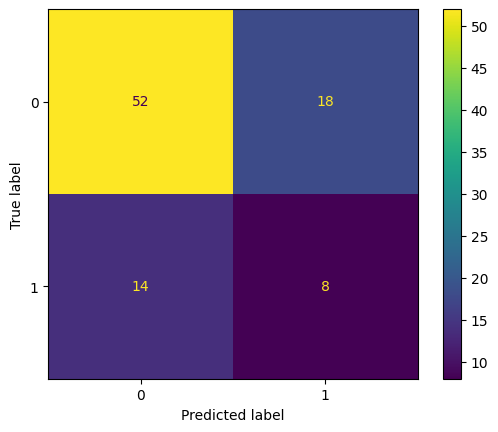


Results for KNN, train/test split seed 1:
Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation f1-score: 0.38

Performance Metrics on the Test Dataset:
   F1 Score: 0.33
   Recall: 36.4%
   Precision: 30.8%
   PR-AUC: 0.30
   MCC: 0.10
   ROC-AUC: 0.56
   Accuracy: 65.2%
------------------------------------------------------------


Running GridSearchCV for LogisticRegression...


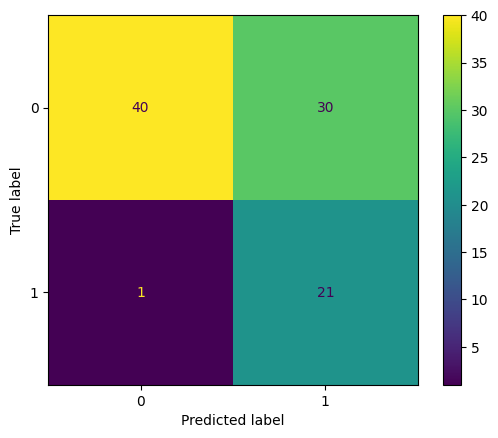


Results for LogisticRegression, train/test split seed 1:
Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation f1-score: 0.50

Performance Metrics on the Test Dataset:
   F1 Score: 0.58
   Recall: 95.5%
   Precision: 41.2%
   PR-AUC: 0.82
   MCC: 0.45
   ROC-AUC: 0.91
   Accuracy: 66.3%
------------------------------------------------------------


Running GridSearchCV for SVM_linear...


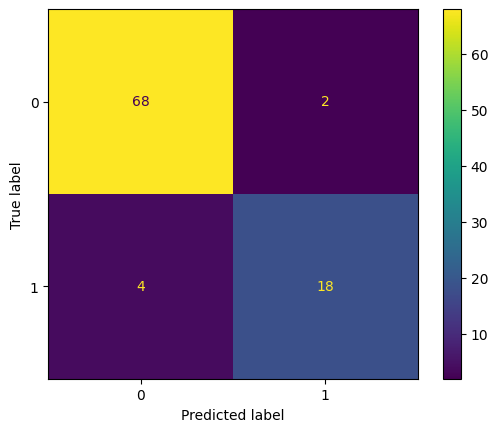


Results for SVM_linear, train/test split seed 1:
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation f1-score: 0.66

Performance Metrics on the Test Dataset:
   F1 Score: 0.86
   Recall: 81.8%
   Precision: 90.0%
   PR-AUC: 0.93
   MCC: 0.82
   ROC-AUC: 0.96
   Accuracy: 93.5%
------------------------------------------------------------


Running GridSearchCV for SVM...


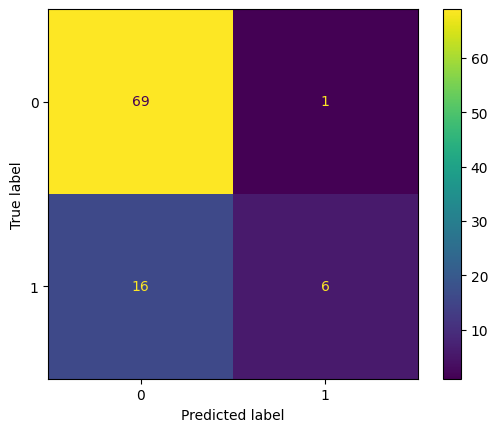


Results for SVM, train/test split seed 1:
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation f1-score: 0.42

Performance Metrics on the Test Dataset:
   F1 Score: 0.41
   Recall: 27.3%
   Precision: 85.7%
   PR-AUC: 0.68
   MCC: 0.42
   ROC-AUC: 0.86
   Accuracy: 81.5%
------------------------------------------------------------


Running GridSearchCV for GaussianNB...


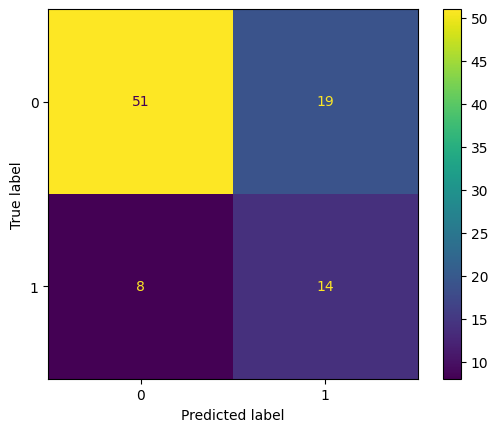


Results for GaussianNB, train/test split seed 1:
Best parameters: {'var_smoothing': 0.01}
Best cross-validation f1-score: 0.60

Performance Metrics on the Test Dataset:
   F1 Score: 0.51
   Recall: 63.6%
   Precision: 42.4%
   PR-AUC: 0.40
   MCC: 0.32
   ROC-AUC: 0.75
   Accuracy: 70.7%
------------------------------------------------------------


Running GridSearchCV for RandomForest...


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, average_precision_score, roc_auc_score
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

    "KNN": {
        "n_neighbors": [3, 5, 7, 11],
        "weights": ["uniform", "distance"],
    },
    "LogisticRegression": {
        "C": [0.001, 0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"],  # saga supports all penalties
    },
    "SVM_linear": {
        "C": [0.1, 1, 10],

        "kernel": ["linear"],
    },
    "SVM": {
        "C": [0.1, 1, 10, 20],
        "gamma": ["scale", "auto"],
        "kernel": ["rbf"],
    },
    "GaussianNB": {
         "var_smoothing": [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01],
    },
    "RandomForest": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "n_estimators": [50, 100, 200],
    },
    "XGBoost": {
        "learning_rate": [0.1, 0.3, 0.5],
        "max_depth": [1, 3, 6],
        "n_estimators": [100, 200, 500, 700],
    },
    "NeuralNet": {
        "hidden_layer_sizes": [(50,), (100,), (200,), (50, 50)],
        "activation": ["relu", "tanh"],
        "alpha": [0.0001, 0.001, 0.01],
    },
}

# Split into training and test sets
for i in range(5): # range(5) ==> [0,1,2,3,4] #loop through 5 times for each random seed
  train_test_split_seed = 41 * i + 1
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=train_test_split_seed, stratify=y)

  # Standardize features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  results = {}

  for model_name, param_grid in param_grids.items():
      print(f"\n\nRunning GridSearchCV for {model_name}...")

      if model_name == "KNN":
          base_model = KNeighborsClassifier()
      elif model_name == "LogisticRegression":
          base_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
      elif model_name == "SVM_linear":
          base_model = SVC(random_state=42, probability=True)
      elif model_name == "SVM":
          base_model = SVC(random_state=42, probability=True)
      elif model_name == "GaussianNB":
          base_model = GaussianNB()
      elif model_name == "RandomForest":
          base_model = RandomForestClassifier(random_state=42)
      elif model_name == "XGBoost":
          base_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Suppress deprecation warning
      elif model_name == "NeuralNet":
          base_model = MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence
